# 3. Scipy

#### Scipy is a python-based ecosystem of open-source software for mathematics, science, and engineering

#### It contains various toolboxes dedicated to common issues scientific computing

## 3.1 Project : Alcohol consumption of students

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, arange
from scipy import stats
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
student = pd.read_csv("student-alcohol-consumption/student-por.csv", sep=",")

In [4]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


##### In this demonstration we are interested inn 3 variables:

##### 1. Alcohol consumption level (we will create it and call it ac1)
##### 2. Final grade for the course subject (G3)
##### 3. Gender of the student

In [5]:
student.rename(columns = {'sex':'gender'}, inplace=True)
student['alcohol_index'] = (5*student['Dalc'] + 2*student['Walc'])/7
# Alcohol consumption level
student['ac1'] = student['alcohol_index'] <= 2
student['ac1'] = student['ac1'].map({True: 'Low', False: 'High'})

## Confidence Intervals

### Confidence interval for the mean of the final grade

#### We can calculate confidence intervals for means and for propotions

In [6]:
sample_size = student.shape[0]
print(sample_size)

649


#### Because we have a sample size that is much greater than 30, we can use the Central Limit Theorem to calculate confidence intervals. According to this theorem we can calculate a confidence interval for the mean using the normal distribution.

#### To get the confidence interval for the mean we need three numbers:

#### 1. Sample Mean
#### 2. Standard Error
#### 3. Confidence Level

In [7]:
sample_mean_grade = student['G3'].mean()
sample_mean_grade

11.906009244992296

In [8]:
std_error_grades = student['G3'].std()/sqrt(sample_size)

In [9]:
stats.norm.interval(0.95, loc=sample_mean_grade, scale=std_error_grades)

(11.65745768566587, 12.154560804318722)

#### Now let's calculate a confidence interval for the propotion of students with High Alcohol Consumption Level. Again we need 3 numbers:

#### 1. Sample propotion
#### 2. Standard Error
#### 3. Confidence Level

In [10]:
student['ac1'].value_counts(normalize=True)

Low     0.744222
High    0.255778
Name: ac1, dtype: float64

In [11]:
high_prop = student['ac1'].value_counts(normalize=True)['High']
std_error_prop = sqrt(high_prop*(1-high_prop)/sample_size)

In [12]:
stats.norm.interval(0.98, loc=high_prop, scale=std_error_prop)

(0.21593666225148048, 0.2956195781183193)

#### 25% seems like a good guess for the propotion of students with High Alcohol Consumption Levels in the population

## Probability Calculations

#### There are dozens of probability distribution available in the stats package for doing simulations of random variables or probabolity calculations. 

#### Assumming the P(High ALC) = 0.25. In a class of 10, What is the probability of finding 5 students with high ACL?

In [13]:
stats.binom.pmf(k=5, n=10, p=0.25)

0.058399200439453194

In [14]:
def plot_probs_n(n):
    fig, ax = plt.subplots(1,2, figsize = (14,4))
    # Bar Visualization
    ax[0].bar(x=arange(n+1), height=stats.binom.pmf(k=arange(n+1), n=n, p=0.25))
    ax[0].set_xticks(arange(n+1))
    ax[0].set_title('Probability mass function')
    # Plot Visualization
    ax[1].plot(stats.binom.cdf(k=range(n+1), n=n, p=0.25))
    ax[1].set_xticks(arange(n+1))
    ax[1].set_title('Cumulative distribution function')

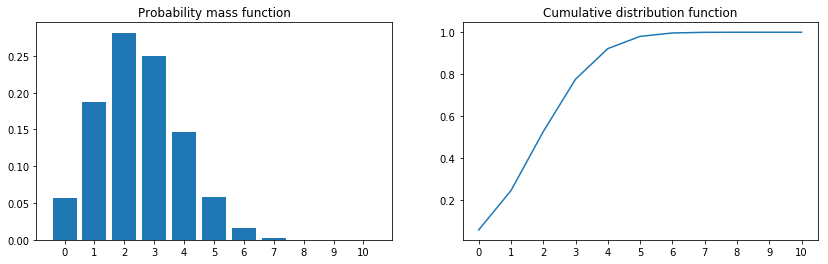

In [15]:
plot_probs_n(10)

## Are the population variances equal in the two groups of students (Low vs High alcohol consumption)?

#### Let's perform the Bartetts's test whose Null Hypothesis is that the variances are equal. We will use a significance level of 5%

In [16]:
student.groupby('ac1')['G3'].var()

ac1
High    11.151406
Low      9.765917
Name: G3, dtype: float64

In [17]:
grades_low_ac1 = student['G3'][student['ac1']=='Low']
grades_high_ac1 = student['G3'][student['ac1']=='High']
stats.bartlett(grades_low_ac1, grades_high_ac1)

BartlettResult(statistic=1.1025085913378183, pvalue=0.29371623181175127)

#### According to the test we cannot reject the Null hypothesis of equal variances, so we will use assume that the two groups are samples from a population with teh same variances. This information will be useful in our next test.

## Does alcohol consumption affect academic performance?

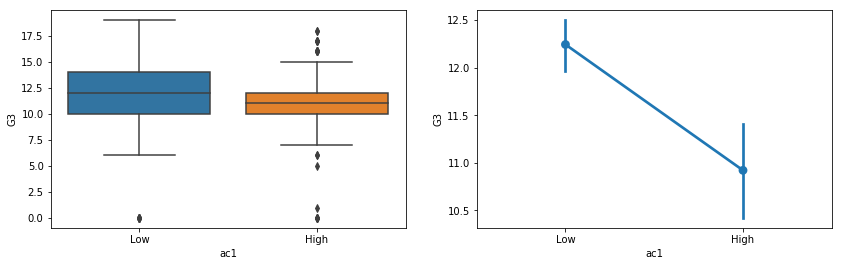

In [18]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
sns.boxplot(x='ac1', y='G3', data=student, ax=axes[0])
sns.pointplot(x='ac1', y='G3', data=student, ax=axes[1])

#### Null Hypothesis : for both groups (High and Low ACL) the population means of the final grade are equal.

#### Alternative Hypothesis : The population means of the final grades are different

#### Assumptions :

#### 1. Independent samples : we will assume that the method collecting the data assured that the answers given by the students are independents

#### 2. Large enough sample size or observations come from a normally-distributed population : this assumption is required if we are working with small samples (less than 30), since in the smaller group we have 166 observations we can say that we have a "large enough" sample

#### 3. variances are equal.

In [20]:
stats.ttest_ind(grades_low_ac1, grades_high_ac1, equal_var=True)

Ttest_indResult(statistic=4.621320706949354, pvalue=4.603608830369269e-06)

#### Since we got such a low p-value we can reject the Null Hypothesis of equal means for the two groups at a level of significance of 5%.

### Conclusion : there is a statiscal significant difference between the grades in the two analyzed groups, since the mean for the group with high alcohol consumption is less than the mean of the group, the result suggest that alcohol consumption has a negative impact on students' academic performance.

## Do male teenagers drink more than female teenagers?

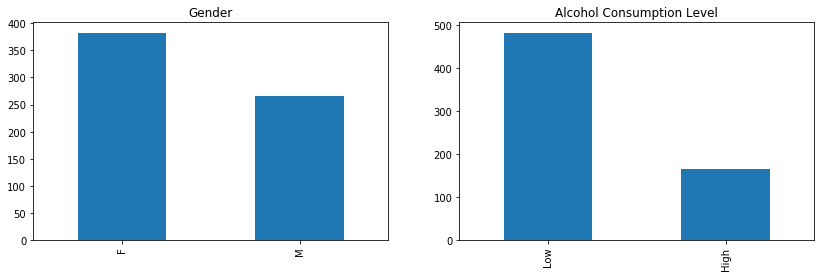

In [21]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
student['gender'].value_counts().plot(kind='bar', ax=axes[0], title='Gender')
student['ac1'].value_counts().plot(kind='bar', ax=axes[1], title='Alcohol Consumption Level')

In [22]:
gender_acl_table = pd.crosstab(student['ac1'], student['gender'])
gender_acl_table

gender,F,M
ac1,,
High,62,104
Low,321,162


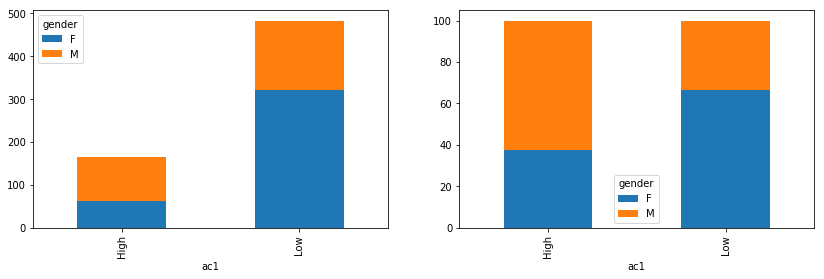

In [24]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
gender_acl_table.plot(kind='bar', stacked=True, ax=axes[0])
(100*(gender_acl_table.T/gender_acl_table.apply(sum, axis=1)).T).plot(kind='bar', stacked=True, ax=axes[1])

In [25]:
chi_stat, p_value, dof, expected = stats.chi2_contingency(gender_acl_table)

In [26]:
p_value

8.72933011769437e-11

In [27]:
expected_table = pd.DataFrame(expected, index=['High','Low'], columns=['F','M'])
expected_table

,F,M
High,97.96302,68.03698
Low,285.03698,197.96302


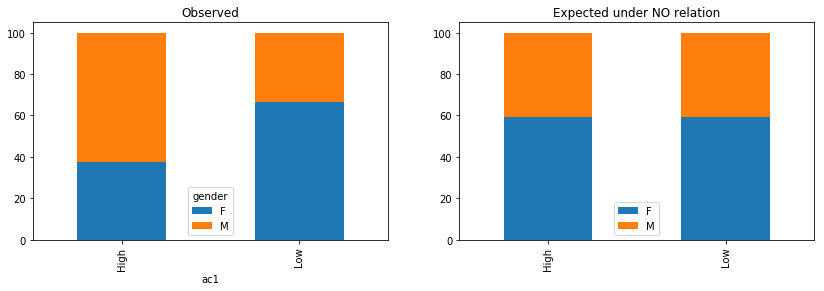

In [29]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
(100*(gender_acl_table.T/gender_acl_table.apply(sum, axis=1)).T).plot(kind='bar', stacked=True, title='Observed', ax=axes[0])
(100*(expected_table.T/expected_table.apply(sum, axis=1)).T).plot(kind='bar', stacked=True, title='Expected under NO relation', ax=axes[1])

In [30]:
#Finish